# Credit Card Approval Prediction

In [1]:
#importing required libriaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Credit_card.csv')
data.head(5)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [3]:
labels = pd.read_csv('Credit_card_label.csv')
labels.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [4]:
# Mergin the data and the labels
df = pd.merge(data, labels, on='Ind_ID', how = 'inner')

In [5]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [6]:
df.shape

(1548, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [9]:
df.duplicated().sum()

0

Some columns are useless and will be simply droped. These columns are  
lnd_ID, Mobile_phone, Work_Phone, Phone, EMAIL_ID  
We need to deal with the Birthday_count, and Employed_days columns  
Deal with the missing values


In [10]:
# Dropping unnecceraily columns 
cols = ['Ind_ID', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID']
df.drop(columns=cols, axis=1, inplace=True)

### EDA

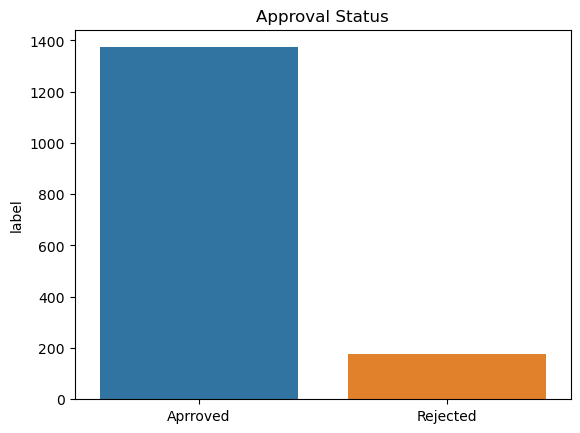

In [11]:
# target column dist
labels = df['label'].value_counts()
sns.barplot(x=['Aprroved', 'Rejected'], y = labels)
plt.title('Approval Status')
plt.show()

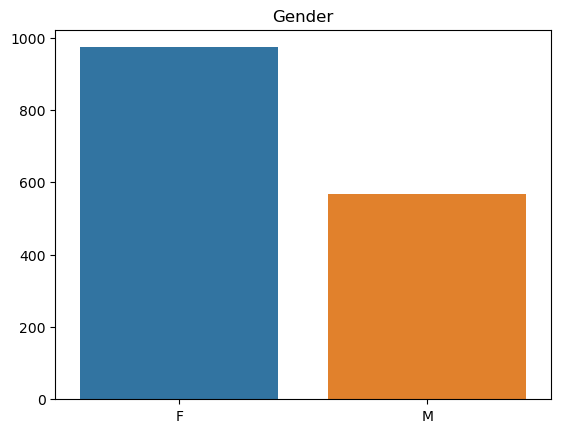

In [12]:
# Gender column
gender = df['GENDER'].value_counts()
sns.barplot(x=gender.index, y = gender.values)
plt.title('Gender')
plt.show()

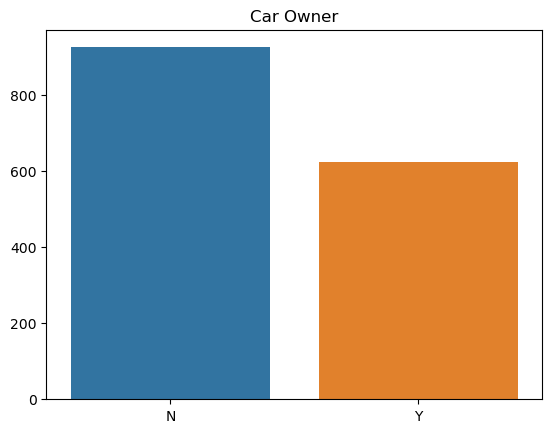

In [13]:
# Car owner column
Car_Owner = df['Car_Owner'].value_counts()
sns.barplot(x=Car_Owner.index, y = Car_Owner.values)
plt.title('Car Owner')
plt.show()

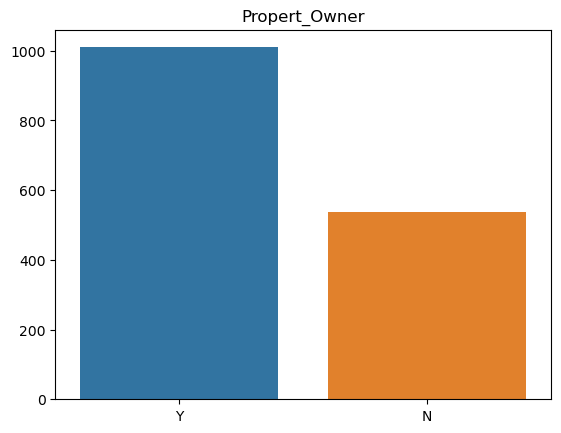

In [14]:
# Propert_Owner column
Propert_Owner = df['Propert_Owner'].value_counts()
sns.barplot(x=Propert_Owner.index, y = Propert_Owner.values)
plt.title('Propert_Owner')
plt.show()

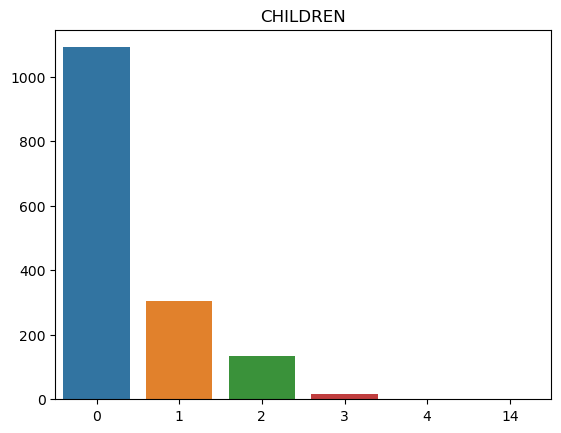

In [15]:
# CHILDREN column
CHILDREN = df['CHILDREN'].value_counts()
sns.barplot(x=CHILDREN.index, y = CHILDREN.values)
plt.title('CHILDREN')
plt.show()

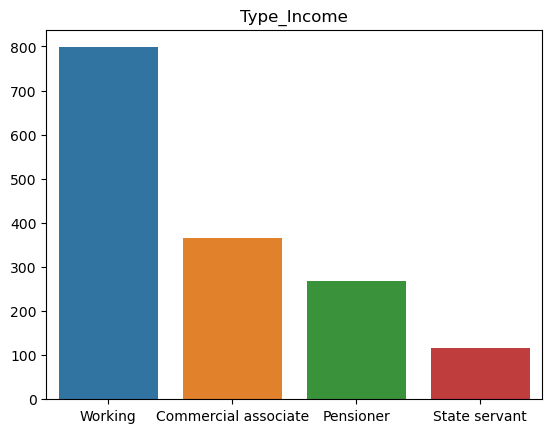

In [16]:
# Type_Income column
Type_Income = df['Type_Income'].value_counts()
sns.barplot(x=Type_Income.index, y = Type_Income.values)
plt.title('Type_Income')
plt.show()

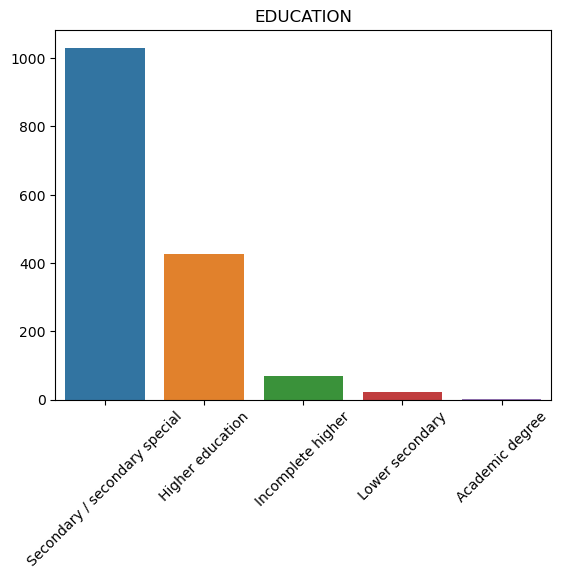

In [17]:
# Type_Income column
EDUCATION = df['EDUCATION'].value_counts()
sns.barplot(x=EDUCATION.index, y = EDUCATION.values)
plt.title('EDUCATION')
plt.xticks(rotation=45)
plt.show()

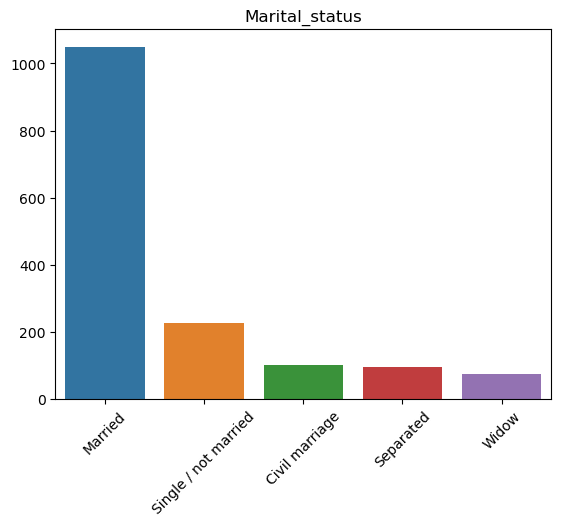

In [18]:
# Marital_status column
Marital_status = df['Marital_status'].value_counts()
sns.barplot(x=Marital_status.index, y = Marital_status.values)
plt.title('Marital_status')
plt.xticks(rotation=45)
plt.show()

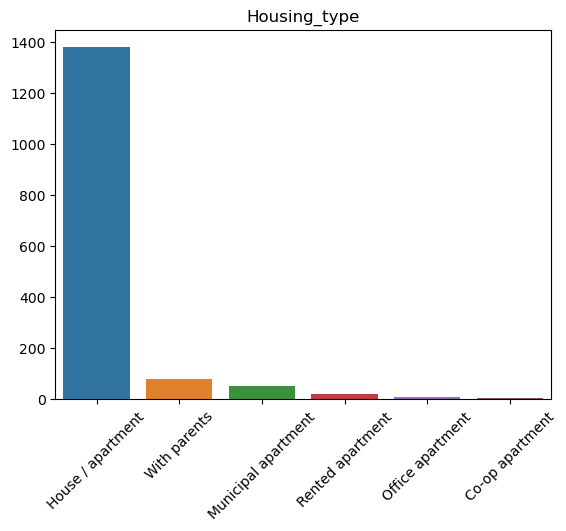

In [19]:
# Housing_type column
Housing_type = df['Housing_type'].value_counts()
sns.barplot(x=Housing_type.index, y = Housing_type.values)
plt.title('Housing_type')
plt.xticks(rotation=45)
plt.show()

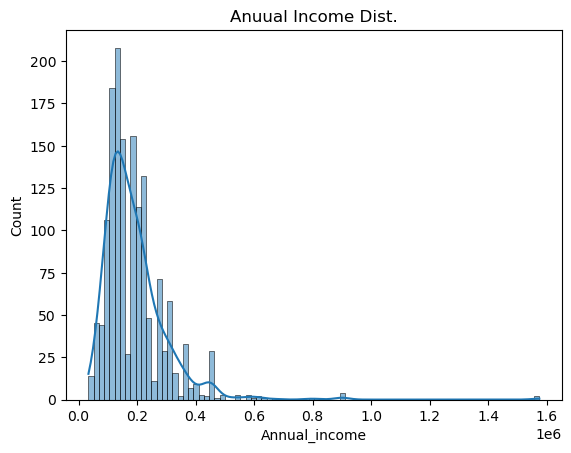

In [20]:
sns.histplot(df['Annual_income'], kde=True)
plt.title('Anuual Income Dist.')
plt.show()

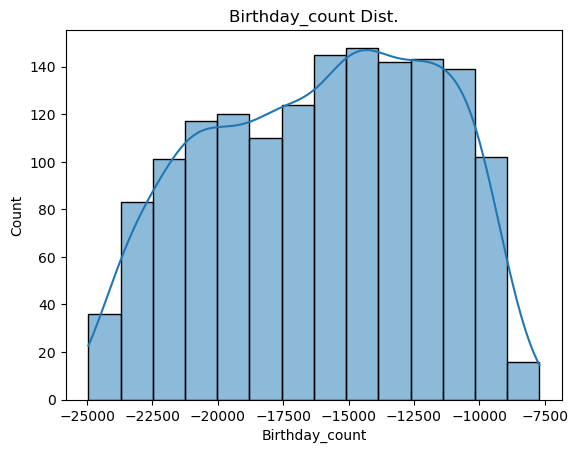

In [21]:
sns.histplot(df['Birthday_count'], kde=True)
plt.title('Birthday_count Dist.')
plt.show()

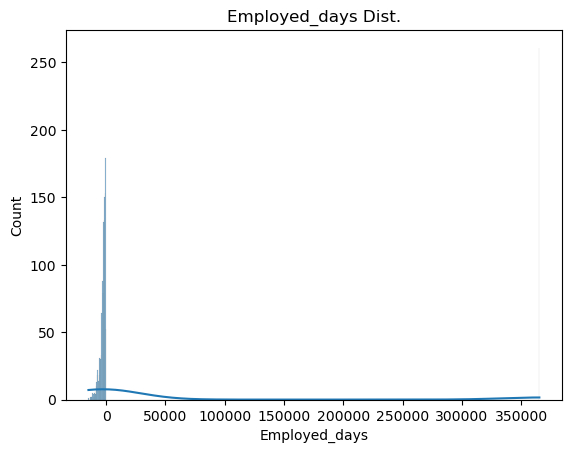

In [22]:
sns.histplot(df['Employed_days'], kde=True)
plt.title('Employed_days Dist.')
plt.show()

There is a huge data imbalacne in the target column label  
there are outliers and skew in some columns

### Data preprocessing

In [23]:
# Dealing with the missing values

#categorical columns
cat_missing = ['GENDER', 'Type_Occupation']
for col in cat_missing:
    col_mode = df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)
    

#numerical columns
num_missing = ['Annual_income','Birthday_count']

for col in num_missing:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)

In [24]:
df.isna().sum()

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [25]:
#dealing with outliers
outlier_cols = ['Annual_income', 'Employed_days']
for col in outlier_cols:
    mean = df[col].mean()
    std = df[col].std()
    threshold = 1.96   # for choosing 95%
    df = df[(df[col] >= mean - threshold * std) & (df[col] <= mean + threshold * std)]

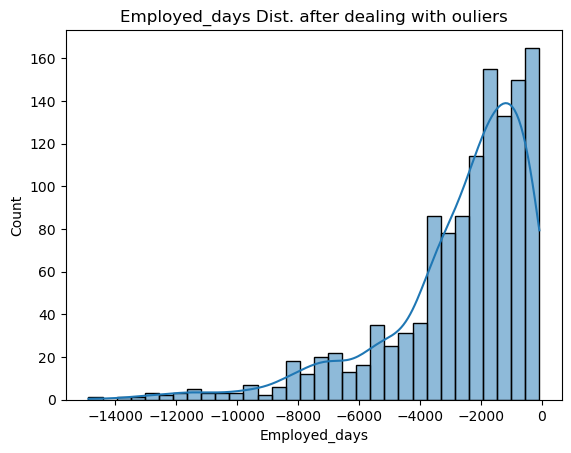

In [26]:
sns.histplot(df['Employed_days'], kde=True)
plt.title('Employed_days Dist. after dealing with ouliers')
plt.show()

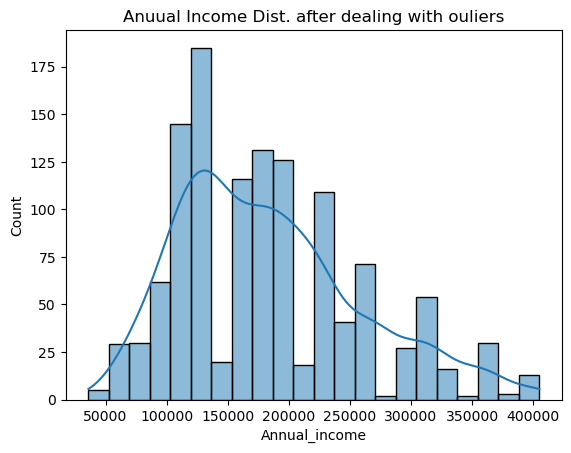

In [27]:
sns.histplot(df['Annual_income'], kde=True)
plt.title('Anuual Income Dist. after dealing with ouliers')
plt.show()

In [28]:
#dealing with the Employed_days and Birthday_count columns
time_cols = ['Birthday_count', 'Employed_days']
for col in time_cols:
    df[col] = abs(df[col]/365)
    df[col] = df[col].astype(int)


In [29]:
df[['Birthday_count', 'Employed_days']]

Birthday_count  Employed_days
1                 37              1
2                 43              1
3                 37              1
4                 37              1
5                 37              1
...              ...            ...
1543              32              5
1544              28              3
1545              36              6
1546              41              1
1547              45              7

[1235 rows x 2 columns]

In [30]:
#need to rename the cols names
df.rename(columns={'Birthday_count':'Age', 'Employed_days':'Employed_years'}, inplace=True)

In [31]:
df[['Age', 'Employed_years']]

Age  Employed_years
1      37               1
2      43               1
3      37               1
4      37               1
5      37               1
...   ...             ...
1543   32               5
1544   28               3
1545   36               6
1546   41               1
1547   45               7

[1235 rows x 2 columns]

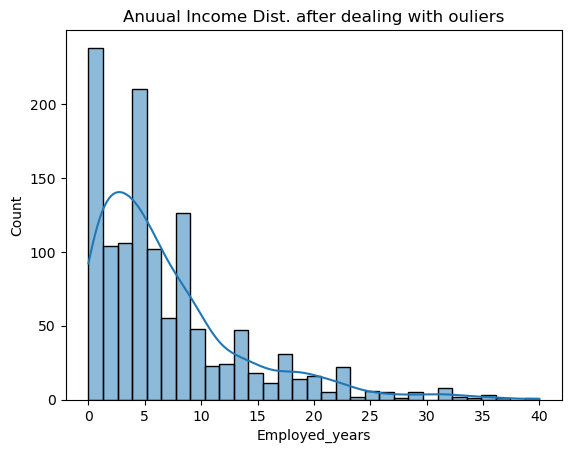

In [32]:
sns.histplot(df['Employed_years'], kde=True)
plt.title('Anuual Income Dist. after dealing with ouliers')
plt.show()

In [33]:
# Dealing with skewness in the Employed_years column
constant = 1e-8
df['Employed_years'] = np.log(df['Employed_years']+constant)

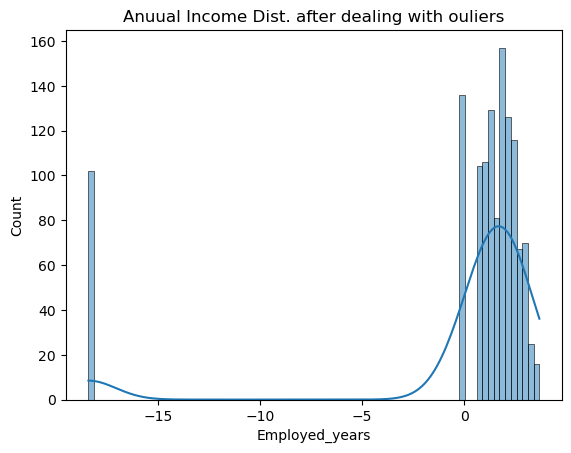

In [34]:
sns.histplot(df['Employed_years'], kde=True)
plt.title('Anuual Income Dist. after dealing with ouliers')
plt.show()

In [35]:
df.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1      F         Y             N         0   315000.00000   
2      F         Y             N         0   315000.00000   
3      F         Y             N         0   191399.32623   
4      F         Y             N         0   315000.00000   
5      F         Y             N         0   315000.00000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   
5             Pensioner  Higher education        Married  House / apartment   

   Age  Employed_years Type_Occupation  Family_Members  label  
1   37    1.000000e-08        Laborers               2      1  
2   43    1.000000e-08        Laborers               2      1  
3   37    1.000000e-08        Laborers               2      1  
4   37    1.000000e-08        Laborers               2      1  
5   37    1.000000e-08        Laborers               2      1

In [36]:
# dealing with categorical columns

#first : binary columns
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['GENDER'] = labelEncoder.fit_transform(df['GENDER'])
df['Car_Owner'] = labelEncoder.fit_transform(df['Car_Owner'])
df['Propert_Owner'] = labelEncoder.fit_transform(df['Propert_Owner'])

In [37]:
df.head()

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
1       0          1              0         0   315000.00000   
2       0          1              0         0   315000.00000   
3       0          1              0         0   191399.32623   
4       0          1              0         0   315000.00000   
5       0          1              0         0   315000.00000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   
5             Pensioner  Higher education        Married  House / apartment   

   Age  Employed_years Type_Occupation  Family_Members  label  
1   37    1.000000e-08        Laborers               2      1  
2   43    1.000000e-08        Laborers               2      1  
3   37    1.000000e-08        Laborers               2      1  
4   37    1.000000e-08        Laborers               2      1  
5   37    1.000000e-08        Laborers               2      1

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 1 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1235 non-null   int32  
 1   Car_Owner        1235 non-null   int32  
 2   Propert_Owner    1235 non-null   int32  
 3   CHILDREN         1235 non-null   int64  
 4   Annual_income    1235 non-null   float64
 5   Type_Income      1235 non-null   object 
 6   EDUCATION        1235 non-null   object 
 7   Marital_status   1235 non-null   object 
 8   Housing_type     1235 non-null   object 
 9   Age              1235 non-null   int32  
 10  Employed_years   1235 non-null   float64
 11  Type_Occupation  1235 non-null   object 
 12  Family_Members   1235 non-null   int64  
 13  label            1235 non-null   int64  
dtypes: float64(2), int32(4), int64(3), object(5)
memory usage: 125.4+ KB


In [39]:
#second non-binary columns 
categorical_columns = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

# Iterate over each categorical column and apply one-hot encoding
for col in categorical_columns:
    df_encoded = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, df_encoded], axis=1)
    df.drop([col], axis=1, inplace=True)

In [40]:
df.head()

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Age  \
1       0          1              0         0   315000.00000   37   
2       0          1              0         0   315000.00000   43   
3       0          1              0         0   191399.32623   37   
4       0          1              0         0   315000.00000   37   
5       0          1              0         0   315000.00000   37   

   Employed_years  Family_Members  label  Type_Income_Commercial associate  \
1    1.000000e-08               2      1                                 1   
2    1.000000e-08               2      1                                 1   
3    1.000000e-08               2      1                                 1   
4    1.000000e-08               2      1                                 1   
5    1.000000e-08               2      1                                 0   

   ...  Type_Occupation_Laborers  Type_Occupation_Low-skill Laborers  \
1  ...                         1                                   0   
2  ...                         1                                   0   
3  ...                         1                                   0   
4  ...                         1                                   0   
5  ...                         1                                   0   

   Type_Occupation_Managers  Type_Occupation_Medicine staff  \
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   
5                         0                               0   

   Type_Occupation_Private service staff  Type_Occupation_Realty agents  \
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
5                                      0                              0   

   Type_Occupation_Sales staff  Type_Occupation_Secretaries  \
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   

   Type_Occupation_Security staff  Type_Occupation_Waiters/barmen staff  
1                               0                                     0  
2                               0                                     0  
3                               0                                     0  
4                               0                                     0  
5                               0                                     0  

[5 rows x 47 columns]

In [41]:
# df['Annual_income'] = df['Annual_income'].astype(int)
# df['Employed_years'] = df['Employed_years'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 1 to 1547
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   GENDER                                   1235 non-null   int32  
 1   Car_Owner                                1235 non-null   int32  
 2   Propert_Owner                            1235 non-null   int32  
 3   CHILDREN                                 1235 non-null   int64  
 4   Annual_income                            1235 non-null   float64
 5   Age                                      1235 non-null   int32  
 6   Employed_years                           1235 non-null   float64
 7   Family_Members                           1235 non-null   int64  
 8   label                                    1235 non-null   int64  
 9   Type_Income_Commercial associate         1235 non-null   uint8  
 10  Type_Income_Pensioner                    1235 no

We will use SMOTE method and not RandomOverSampling because the first method is better for avoiding overfitting of the minority class

In [43]:
# Dealing with the problem of imbalancing using SMOTE method
from imblearn.over_sampling import SMOTE
X = df.drop('label', axis=1)
y = df['label']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()

# Fit LazyClassifier on the training data and evaluate on the testing data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.55it/s]

[LightGBM] [Info] Number of positive: 832, number of negative: 833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499700 -> initscore=-0.001201
[LightGBM] [Info] Start training from score -0.001201


In [47]:
models.sort_values('F1 Score', ascending=False)

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.96               0.96     0.96      0.96   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
LGBMClassifier                     0.95               0.95     0.95      0.95   
BaggingClassifier                  0.95               0.95     0.95      0.95   
XGBClassifier                      0.95               0.95     0.95      0.95   
SVC                                0.94               0.94     0.94      0.94   
LabelPropagation                   0.94               0.94     0.94      0.94   
LabelSpreading                     0.94               0.94     0.94      0.94   
ExtraTreeClassifier                0.93               0.93     0.93      0.93   
DecisionTreeClassifier             0.92               0.92     0.92      0.92   
KNeighborsClassifier               0.91               0.91     0.91      0.91   
QuadraticDiscriminantAnalysis      0.91               0.91     0.91      0.91   
LogisticRegression                 0.90               0.90     0.90      0.90   
CalibratedClassifierCV             0.90               0.90     0.90      0.90   
LinearSVC                          0.90               0.90     0.90      0.89   
LinearDiscriminantAnalysis         0.87               0.87     0.87      0.87   
RidgeClassifier                    0.87               0.87     0.87      0.87   
NuSVC                              0.87               0.87     0.87      0.87   
RidgeClassifierCV                  0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.86               0.86     0.86      0.86   
SGDClassifier                      0.84               0.84     0.84      0.84   
BernoulliNB                        0.84               0.84     0.84      0.84   
PassiveAggressiveClassifier        0.84               0.84     0.84      0.84   
Perceptron                         0.83               0.83     0.83      0.83   
NearestCentroid                    0.83               0.83     0.83      0.83   
GaussianNB                         0.63               0.63     0.63      0.60   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
RandomForestClassifier               0.16  
ExtraTreesClassifier                 0.15  
LGBMClassifier                       0.17  
BaggingClassifier                    0.04  
XGBClassifier                        0.07  
SVC                                  0.09  
LabelPropagation                     0.18  
LabelSpreading                       0.19  
ExtraTreeClassifier                  0.01  
DecisionTreeClassifier               0.01  
KNeighborsClassifier                 0.03  
QuadraticDiscriminantAnalysis        0.03  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.34  
LinearSVC                            0.11  
LinearDiscriminantAnalysis           0.03  
RidgeClassifier                      0.01  
NuSVC                                0.14  
RidgeClassifierCV                    0.01  
AdaBoostClassifier                   0.09  
SGDClassifier                        0.01  
BernoulliNB                          0.01  
PassiveAggressiveClassifier          0.01  
Perceptron                           0.01  
NearestCentroid                      0.01  
GaussianNB                           0.01  
DummyClassifier                      0.01

In [49]:
import plotly.express as px
models_sorted = models.sort_values(by="F1 Score", ascending=False)

line = px.line(data_frame=models_sorted, y=["F1 Score"], markers=True)

line.update_xaxes(title="Model", rangeslider_visible=False)
line.update_yaxes(title="Accuracy")
line.update_traces(line_color="red")
line.update_layout(
    showlegend=True,
    title={
        'text': 'Accuracy vs Model',
        'y': 0.94,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

line.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples when building trees
}

In [52]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [53]:
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

In [54]:
y_pred = best_estimator.predict(X_test)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       277
           1       0.99      0.92      0.96       278

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555

Best Estimator: RandomForestClassifier(max_depth=20, n_estimators=50)
Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.9714075443029888
Test F1 Score: 0.9571694599627562


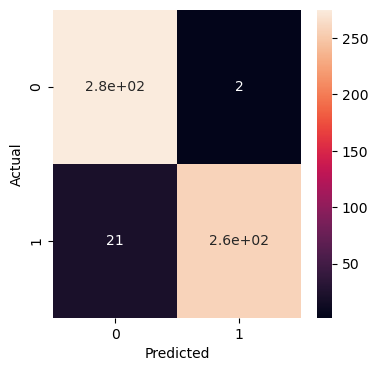

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred))
print("Best Estimator:", grid_search.best_estimator_)
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1_score(y_test, y_pred))

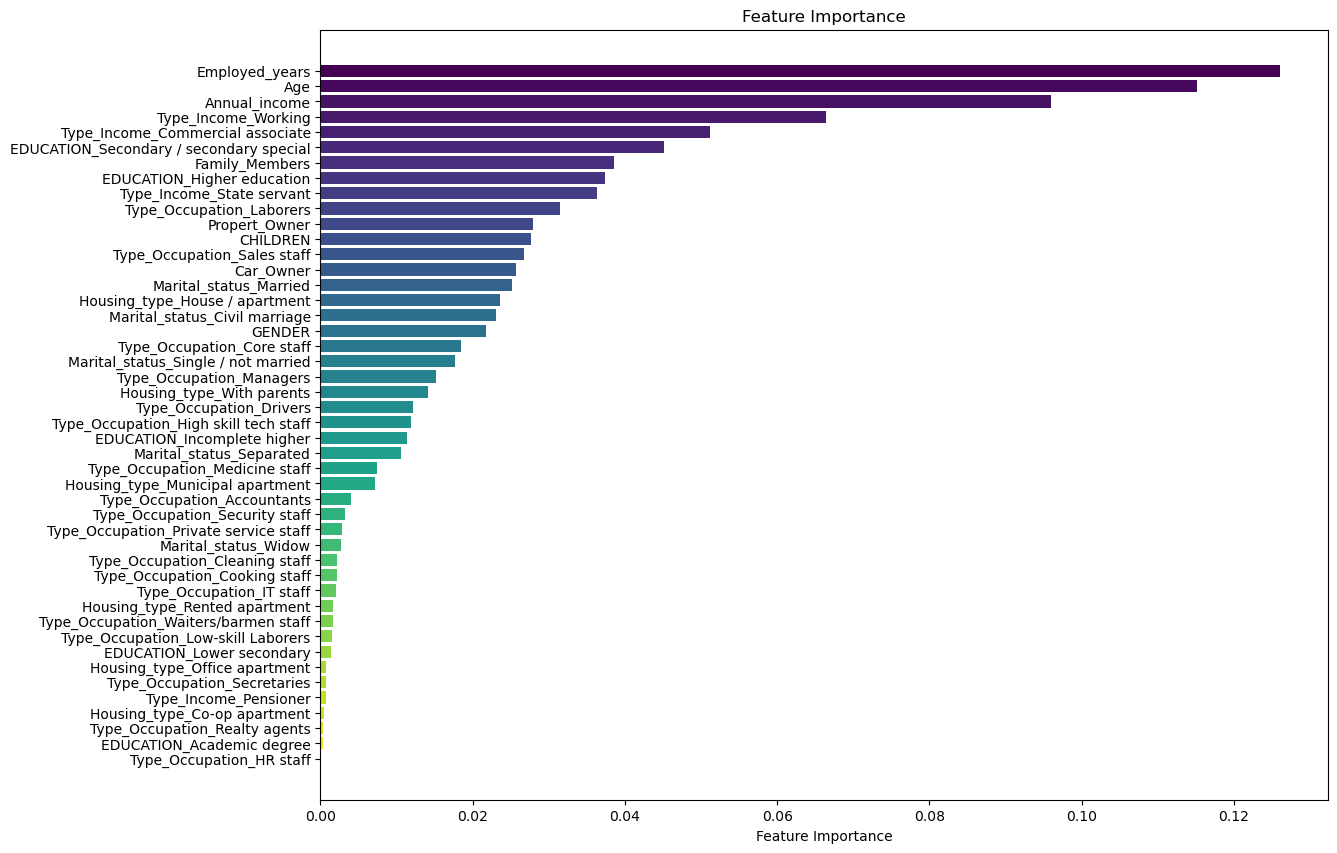

In [58]:
feature_importance = best_estimator.feature_importances_

sorted_idx = feature_importance.argsort()[::-1]

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

plt.figure(figsize=(13, 10))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx], color=colors)
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()
